# **1- Importing required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style(style="dark")

In [2]:
data_path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

# **2- Reading csv file**

In [3]:
df = pd.read_csv(data_path)

# **3- Display top 5 records**

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **4- Checking meta information of dataframe**

## **4.1- Shape of dataframe**

In [5]:
print(f'Shape of dataframe is: {df.shape}')

Shape of dataframe is: (25, 2)


## **4.2- Datatype in Each column**

In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

## **4.3- Checking for NaN values**

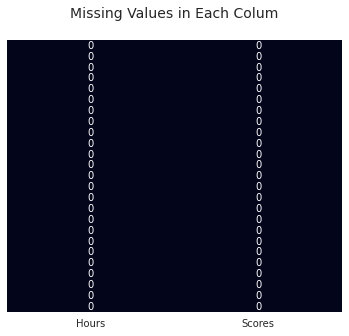

In [7]:
plt.figure(figsize = (6,5))

plt.title("Missing Values in Each Colum\n", size = 14)

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, annot = True, );

**Fortunately data has no missing value**

# **5- EDA**

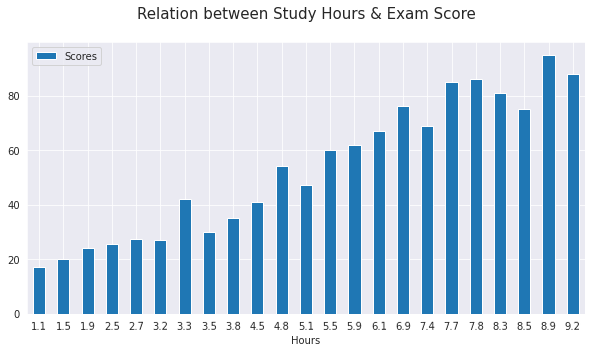

In [8]:
df.groupby("Hours").agg('mean').plot(kind = 'bar', rot = 1, figsize = (10,5))
plt.title("Relation between Study Hours & Exam Score\n", size = 15)
plt.grid()

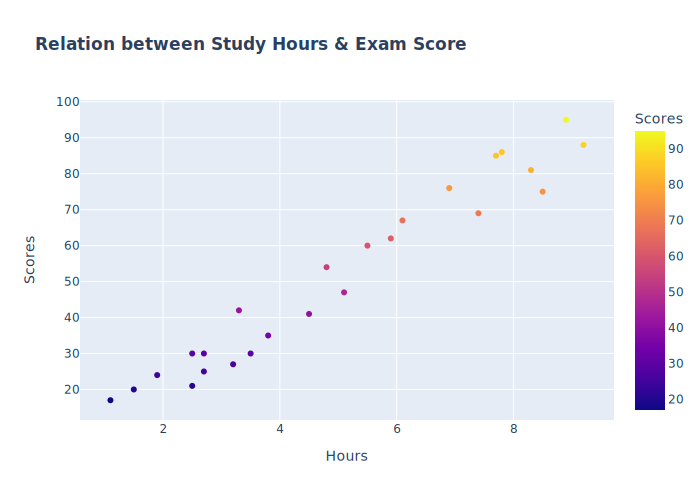

In [9]:
fig = px.scatter(data_frame = df,
           x = "Hours", y = "Scores",
           color="Scores",
           title="<b>Relation between Study Hours & Exam Score</b>\n")

fig.show('svg')

**From the graph, the relation between Study hours and Exam score is linear, So I use linear regression model for this data**

## **6- Seperating Hours and Score**

In [10]:
X = df[['Hours']]
Y = df[['Scores']]

# **7- Importing LinearRegression**

In [11]:
from sklearn.linear_model import LinearRegression

## **8- Creating object of LinearRegression**

In [12]:
model = LinearRegression()

## **9- Training model on data**

In [13]:
model.fit(X, Y)

LinearRegression()

In [14]:
score = model.score(X, Y)

In [15]:
print(f'Model score is: {score}')

Model score is: 0.9529481969048356


In [16]:
intercept = model.intercept_
slope = model.coef_

print(f"Intercept: {intercept}")
print(f'Slope: {slope}')


Intercept: [2.48367341]
Slope: [[9.77580339]]


In [17]:
def line(x, w = 0, b = 0):           # for line equation
    return x * w + b                 # x: input , w: slope/weight, b: bias

In [18]:
def plot_best_fit_line(X, Y, slope, intercept):
    y_predict = line(X, w = slope, b = intercept)
    plt.figure(figsize = (10,5))
    plt.title("Visualizing Best Fit Line of model\n", size = 15)
    plt.scatter(X, Y)
    plt.plot(X,y_predict, color='r', label = "Best fit line")
    plt.legend()
    plt.xlabel("Study Hours")
    plt.ylabel("Exam Score")
    plt.grid()
    plt.show()

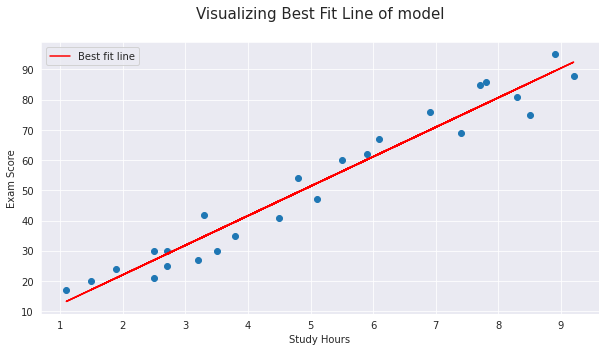

In [19]:
plot_best_fit_line(X, Y, slope, intercept)

## **10. Required: What will be predicted score if a student studies for 9.25 hrs/ day?**

In [20]:
model.predict([[9.25]])

array([[92.90985477]])

**Hence if some student study 9.25 hrs/day. His/Her Exam score will be 92.90 %**